In [20]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
tr = pd.read_pickle('../processed/trace_3_clusters.pkl')
tr_sum = tr.groupby(['user_id']).mean()

srv = pd.read_pickle('../processed/survey.pkl')

df = tr_sum.merge(srv, on=['user_id'], how='left')
df.drop(columns=['username', 'term', 'section'], inplace=True)
df

,user_id,event_count,event_type_HintButtonPressed,event_type_LoadLastSave,event_type_LoadPreviousExcerciseCode,event_type_NextInstruction,event_type_PreviousInstruction,event_type_RunCode,event_type_SaveWorkspace,event_type_change,...,major_cs,computer_skill,experience,blockbased,age,gender_1,gender_2,pretest,posttest,nlg
0,0.0,142.4,4.2,0.0,0.0,2.0,0.0,2.6,0.6,5.8,...,0,2.0,0.0,0.0,18.0,1,0,37.50,70.83,53.33
1,2.0,169.6,0.6,0.2,0.6,3.0,0.0,3.0,0.4,14.0,...,0,4.0,1.0,0.0,21.0,0,1,47.83,16.67,-65.15
2,4.0,203.4,1.6,0.0,0.6,2.2,1.0,2.8,0.2,4.6,...,0,3.0,1.0,0.0,18.0,1,0,41.67,75.00,57.14
3,5.0,205.8,2.6,0.0,0.8,3.8,0.8,1.6,0.2,17.6,...,0,4.0,0.0,0.0,19.0,0,1,33.33,29.17,-12.48
4,7.0,171.6,0.2,0.0,0.2,2.6,0.2,2.8,0.2,49.8,...,0,3.0,1.0,0.0,18.0,0,1,87.50,95.83,66.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,233.0,166.4,0.4,0.0,0.4,2.2,0.0,6.8,0.4,6.2,...,0,2.0,1.0,1.0,18.0,1,0,76.67,63.33,-17.40
145,234.0,128.0,1.0,0.0,0.2,3.8,1.4,2.2,0.2,10.6,...,0,3.0,0.0,1.0,18.0,0,1,63.33,60.00,-5.26
146,235.0,330.2,2.6,0.0,0.8,3.0,0.8,5.8,0.0,26.8,...,0,4.0,1.0,0.0,20.0,0,1,53.33,56.67,7.16
147,237.0,98.4,0.0,0.0,0.2,2.0,0.0,1.2,0.2,5.2,...,0,3.0,0.0,1.0,19.0,1,0,96.67,93.33,-3.46


/Users/fahmid/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:>

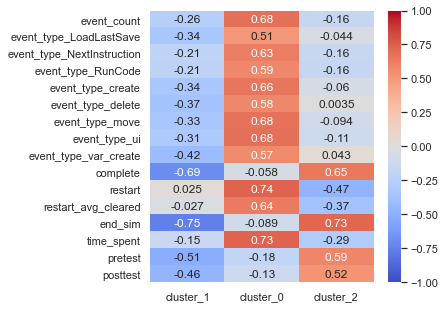

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

corr = df.corr(method='spearman')
c = corr[['cluster_1', 'cluster_0', 'cluster_2']]
dlt_idx = ['cluster_0', 'cluster_1', 'cluster_2', 'user_id']
for i, row in c.iterrows():
    if (max(row)>=.5) or (min(row)<=-.5):
        continue
    dlt_idx.append(i)
c.drop(index=dlt_idx, inplace=True)
sns.heatmap(c, ax=ax, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [42]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['user_id', 'posttest', 'nlg'], axis=1), df[['posttest']],
                                                    train_size=0.75, test_size=0.25)


In [43]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, scoring='neg_mean_absolute_error')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Version 0.11.5 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.
/Users/fahmid/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Generation 1 - Current best internal CV score: -10.114674899849726
Generation 2 - Current best internal CV score: -10.114674899849726
Generation 3 - Current best internal CV score: -9.619017827564857
Generation 4 - Current best internal CV score: -9.619017827564857
Generation 5 - Current best internal CV score: -9.594888991954942
Best pipeline: ElasticNetCV(SelectFwe(input_matrix, alpha=0.031), l1_ratio=0.75, tol=0.001)
-11.229388165095536


/Users/fahmid/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [41]:
df.drop(['user_id', 'posttest', 'nlg'], axis=1)

,event_count,event_type_HintButtonPressed,event_type_LoadLastSave,event_type_LoadPreviousExcerciseCode,event_type_NextInstruction,event_type_PreviousInstruction,event_type_RunCode,event_type_SaveWorkspace,event_type_change,event_type_create,...,time_spent,year,major_cs,computer_skill,experience,blockbased,age,gender_1,gender_2,pretest
0,142.4,4.2,0.0,0.0,2.0,0.0,2.6,0.6,5.8,12.8,...,406.3864,1.0,0,2.0,0.0,0.0,18.0,1,0,37.50
1,169.6,0.6,0.2,0.6,3.0,0.0,3.0,0.4,14.0,12.4,...,276.8614,3.0,0,4.0,1.0,0.0,21.0,0,1,47.83
2,203.4,1.6,0.0,0.6,2.2,1.0,2.8,0.2,4.6,16.2,...,370.3966,1.0,0,3.0,1.0,0.0,18.0,1,0,41.67
3,205.8,2.6,0.0,0.8,3.8,0.8,1.6,0.2,17.6,18.4,...,487.0200,1.0,0,4.0,0.0,0.0,19.0,0,1,33.33
4,171.6,0.2,0.0,0.2,2.6,0.2,2.8,0.2,49.8,12.0,...,181.8692,5.0,0,3.0,1.0,0.0,18.0,0,1,87.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,166.4,0.4,0.0,0.4,2.2,0.0,6.8,0.4,6.2,14.2,...,303.2744,2.0,0,2.0,1.0,1.0,18.0,1,0,76.67
145,128.0,1.0,0.0,0.2,3.8,1.4,2.2,0.2,10.6,11.0,...,363.7052,1.0,0,3.0,0.0,1.0,18.0,0,1,63.33
146,330.2,2.6,0.0,0.8,3.0,0.8,5.8,0.0,26.8,19.4,...,857.9006,1.0,0,4.0,1.0,0.0,20.0,0,1,53.33
147,98.4,0.0,0.0,0.2,2.0,0.0,1.2,0.2,5.2,10.6,...,177.5098,2.0,0,3.0,0.0,1.0,19.0,1,0,96.67


In [1]:
import pandas as pd

df = pd.read_pickle('../processed/ws.pkl')

df.to_csv('../processed/ws.csv')